In [1]:
  # Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle

In [2]:
    df = pd.read_csv("customer_churn.csv")  

In [3]:
    print(df.head())
    print(df.info())
    print(df.describe())
    print(df.isnull().sum())

   CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           1   22  Female      25               14              4   
1           2   41  Female      28               28              7   
2           3   47    Male      27               10              2   
3           4   35    Male       9               12              5   
4           5   53  Female      58               24              9   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0             27             Basic         Monthly          598   
1             13          Standard         Monthly          584   
2             29           Premium          Annual          757   
3             17           Premium       Quarterly          232   
4              2          Standard          Annual          533   

   Last Interaction  Churn  
0                 9      1  
1                20      0  
2                21      0  
3                18      0  
4                18      0  
<c

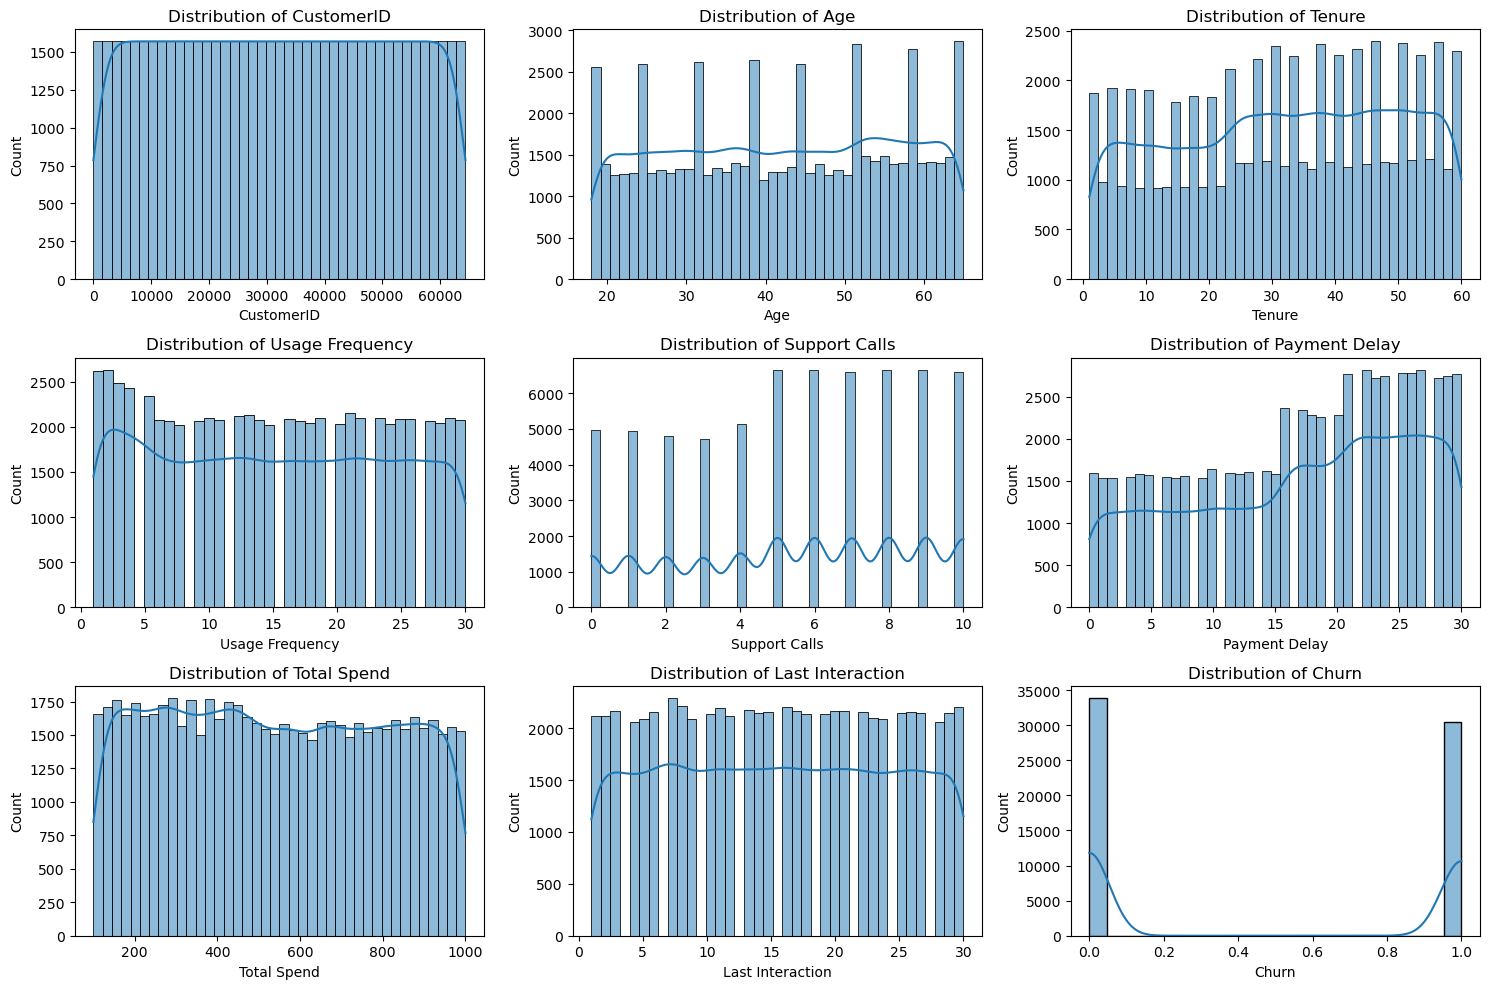

In [4]:
# Automatically select numeric columns from the DataFrame
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Visualizing numeric columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [5]:
df = df.dropna() # Remove all rows with any null values
df= df[(df['Usage Frequency'] >= 0) & (df['Total Spend']>= 0)]

In [6]:
    # Gender
    df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})

    # Subscription Type
    df['Subscription Type'] = df['Subscription Type'].replace({'Basic': 1, 'Standard': 2, 'Premium': 3})

    # Contract Length
    df['Contract Length'] = df['Contract Length'].replace({'Monthly': 1, 'Quarterly': 2, 'Annual': 3})


In [7]:
  print(df.head())

   CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           1   22       0      25               14              4   
1           2   41       0      28               28              7   
2           3   47       1      27               10              2   
3           4   35       1       9               12              5   
4           5   53       0      58               24              9   

   Payment Delay  Subscription Type  Contract Length  Total Spend  \
0             27                  1                1          598   
1             13                  2                1          584   
2             29                  3                3          757   
3             17                  3                2          232   
4              2                  2                3          533   

   Last Interaction  Churn  
0                 9      1  
1                20      0  
2                21      0  
3                18      0  
4                18

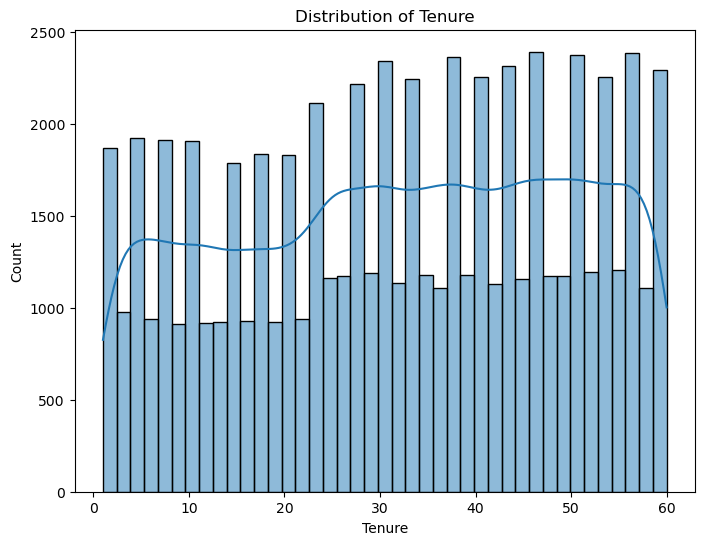

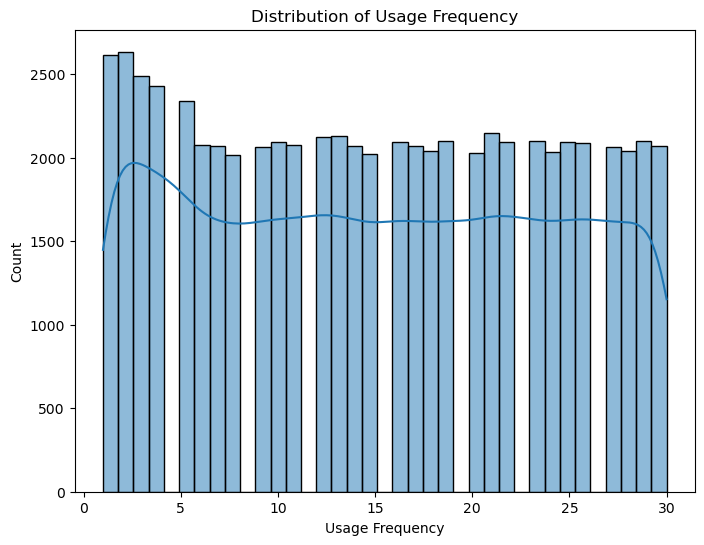

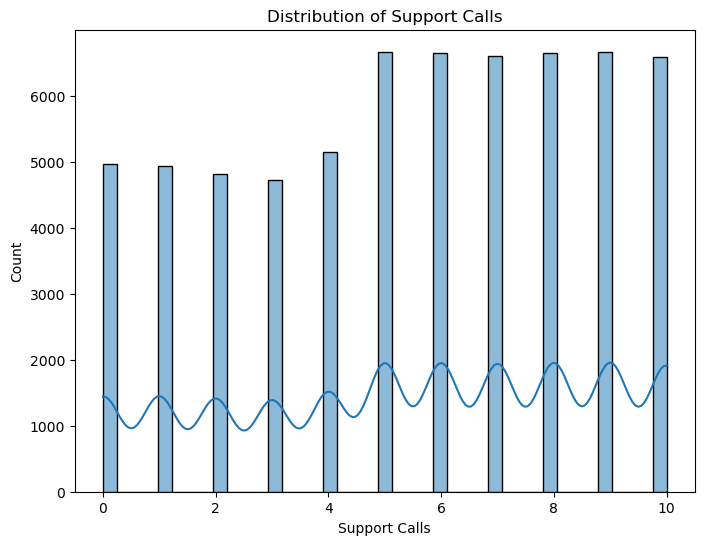

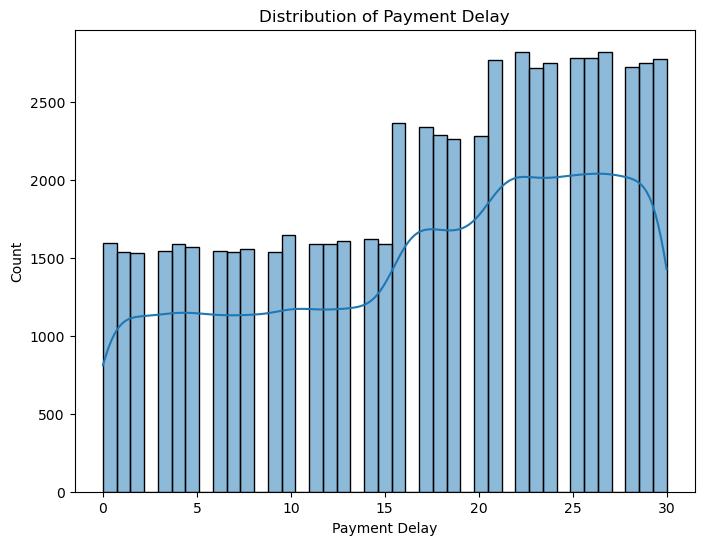

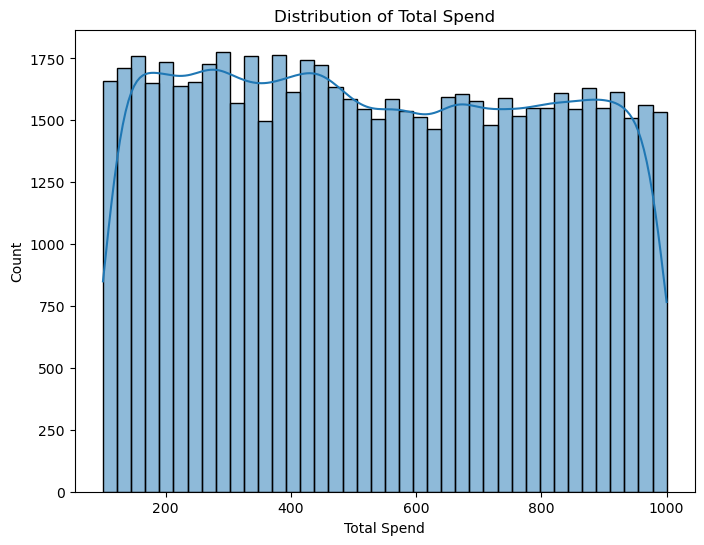

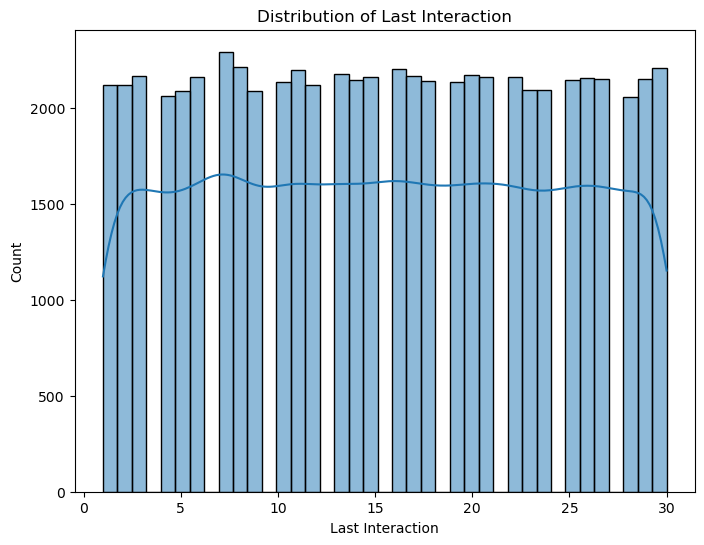

In [8]:
numerical_features = ['Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


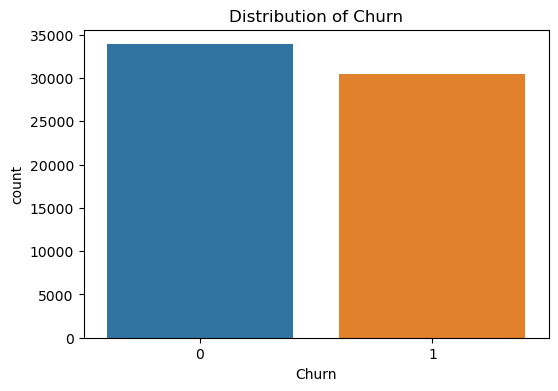

In [9]:
         plt.figure(figsize=(6, 4))
         sns.countplot(data=df, x='Churn')
         plt.title('Distribution of Churn')
         plt.show()


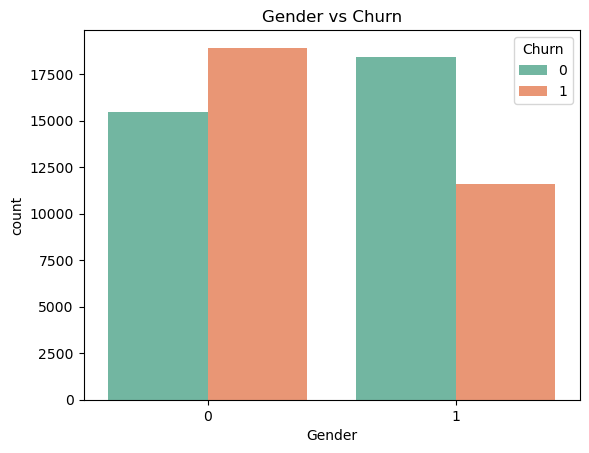

In [10]:
# Gender distribution by Churn
sns.countplot(x='Gender', hue='Churn', data=df, palette='Set2')
plt.title("Gender vs Churn")
plt.show()

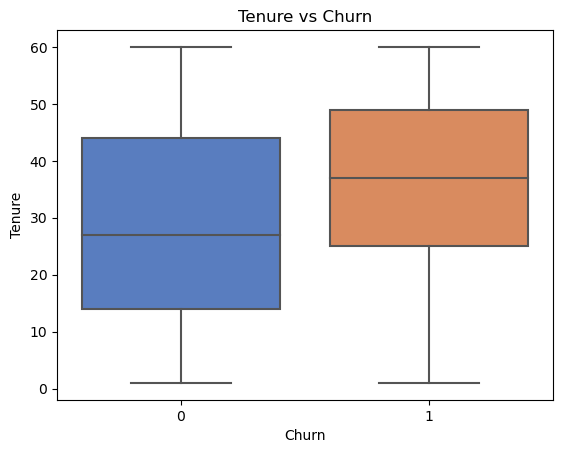

In [11]:
# Tenure vs Churn
sns.boxplot(x='Churn', y='Tenure', data=df, palette='muted')
plt.title("Tenure vs Churn")
plt.show()

T-Test Results:
T-Statistic: 50.762800384898156
P-Value: 0.0


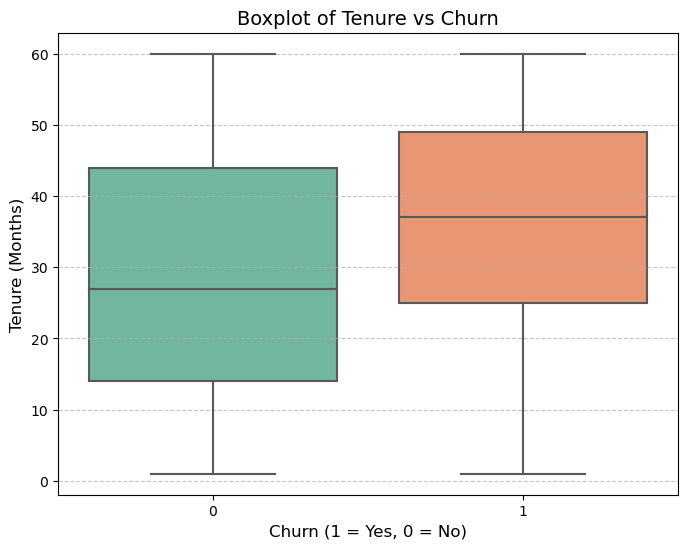

In [12]:
# Separating tenure data for churned and non-churned customers
tenure_churned = df[df['Churn'] == 1]['Tenure']
tenure_non_churned = df[df['Churn'] == 0]['Tenure']

# Conducting an independent t-test
t_stat, p_value = stats.ttest_ind(tenure_churned, tenure_non_churned, equal_var=False)

# Displaying t-test results
print("T-Test Results:")
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Creating a boxplot to visualize tenure vs churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Tenure', data=df, palette='Set2')
plt.title('Boxplot of Tenure vs Churn', fontsize=14)
plt.xlabel('Churn (1 = Yes, 0 = No)', fontsize=12)
plt.ylabel('Tenure (Months)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

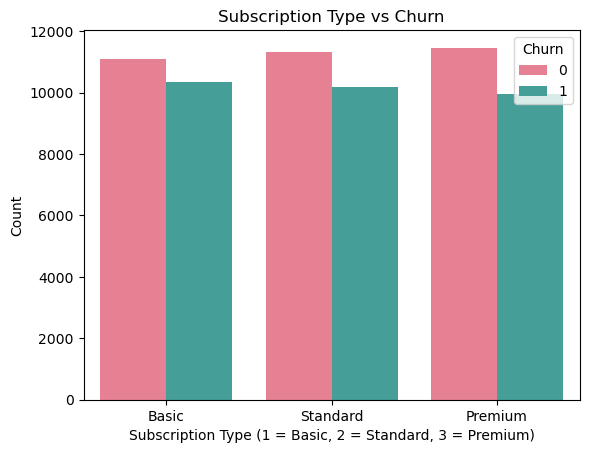

In [13]:
# Map Subscription Type values to meaningful labels
df['Subscription Type Label'] = df['Subscription Type'].map({1: 'Basic', 2: 'Standard', 3: 'Premium'})

# Subscription Type vs Churn
sns.countplot(x='Subscription Type Label', hue='Churn', data=df, palette='husl')
plt.title("Subscription Type vs Churn")
plt.xlabel("Subscription Type (1 = Basic, 2 = Standard, 3 = Premium)")
plt.ylabel("Count")
plt.show()


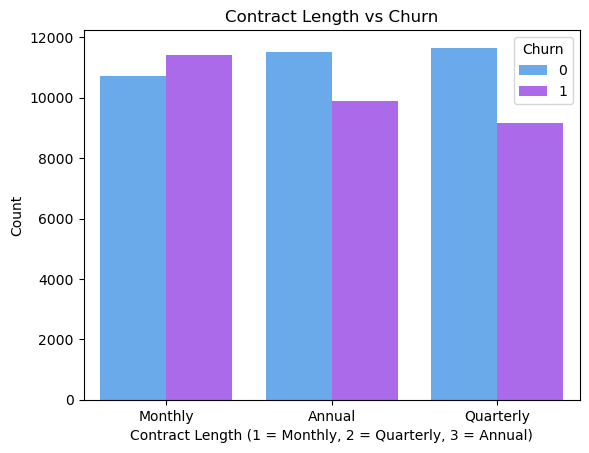

In [14]:
# Map Contract Length values to meaningful labels
df['Contract Length Label'] = df['Contract Length'].map({1: 'Monthly', 2: 'Quarterly', 3: 'Annual'})

# Contract Length vs Churn
sns.countplot(x='Contract Length Label', hue='Churn', data=df, palette='cool')
plt.title("Contract Length vs Churn")
plt.xlabel("Contract Length (1 = Monthly, 2 = Quarterly, 3 = Annual)")
plt.ylabel("Count")
plt.show()


Statistics for selected columns:
                        Mean  Median   Mode
Column                                     
Tenure             31.994827    33.0   46.0
Usage Frequency    15.080234    15.0    2.0
Support Calls       5.400690     6.0    9.0
Payment Delay      17.133952    19.0   22.0
Total Spend       541.023379   534.0  226.0
Last Interaction   15.498850    15.0    7.0


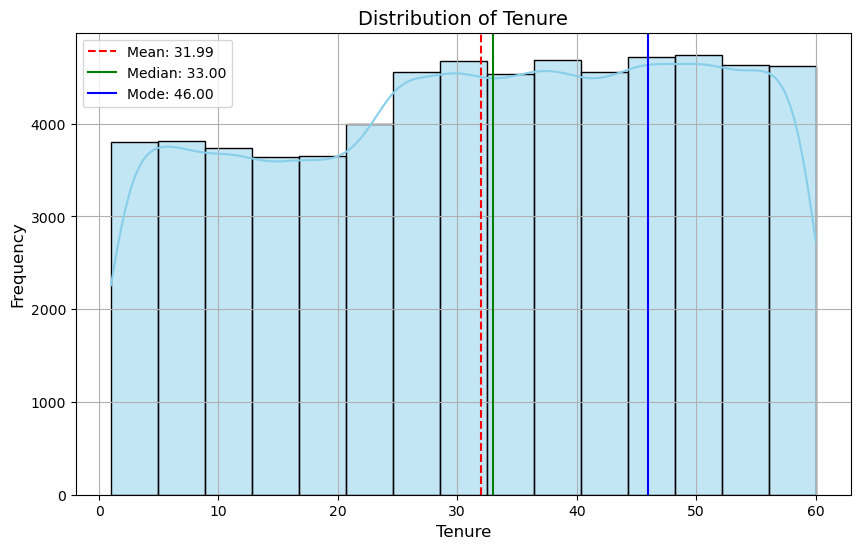

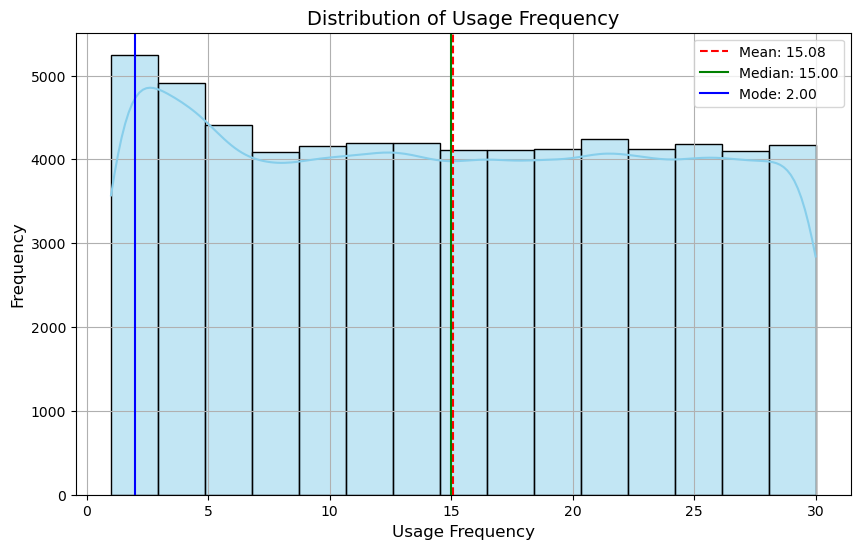

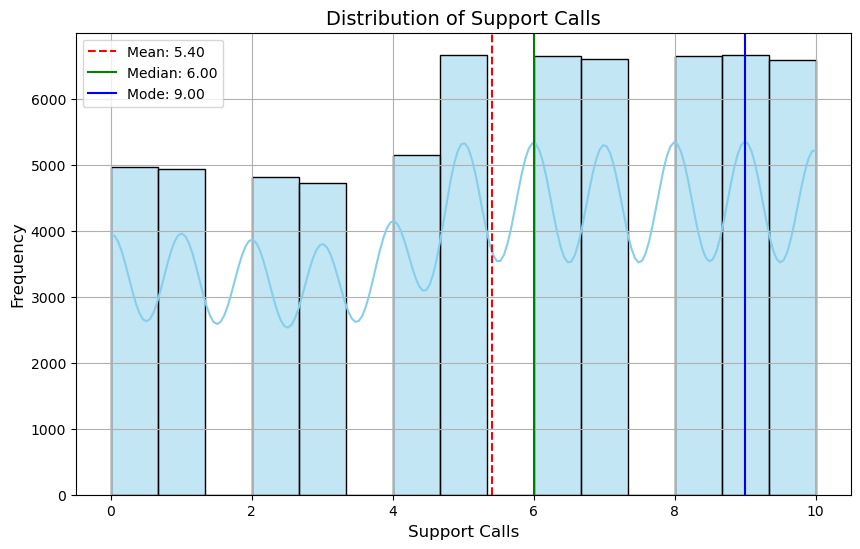

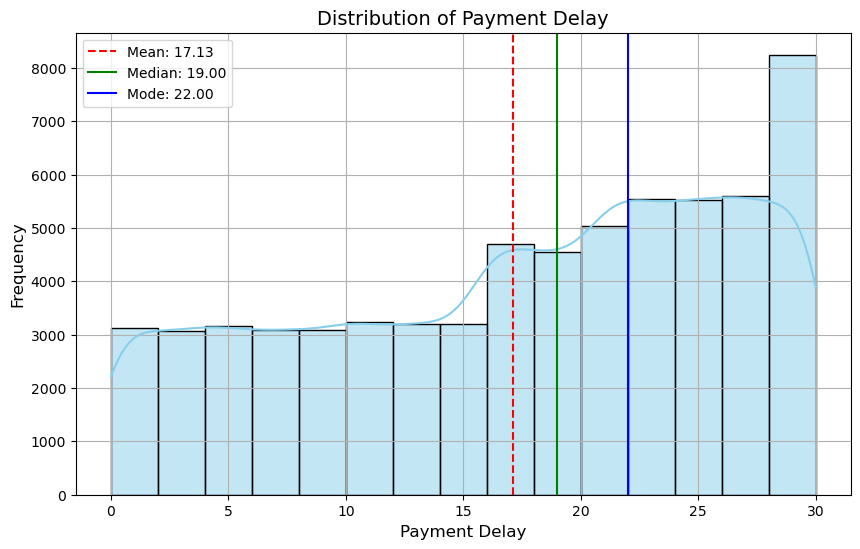

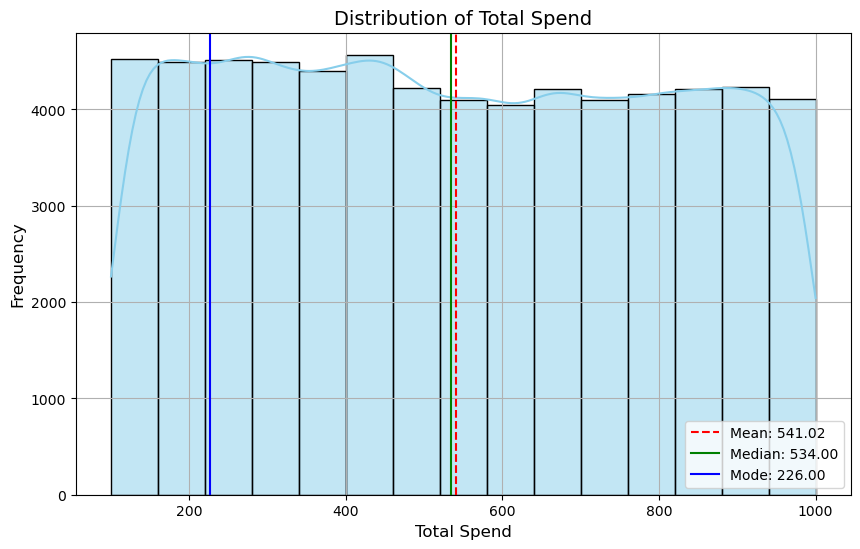

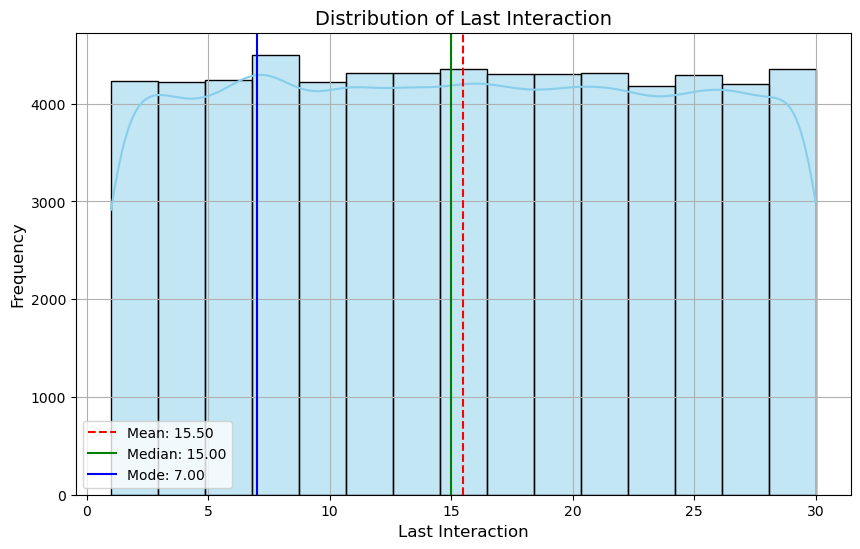

In [15]:
# Columns of interest
columns = ['Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']

# Calculate statistics for each column
statistics = {}
for column in columns:
    mean = df[column].mean()
    median = df[column].median()
    mode = df[column].mode().iloc[0]  # Take the first mode
    statistics[column] = {'Mean': mean, 'Median': median, 'Mode': mode}

# Display the statistics as a DataFrame
statistics_df = pd.DataFrame(statistics).T
statistics_df.index.name = 'Column'
print("Statistics for selected columns:")
print(statistics_df)

# Visualization for each column
for column in columns:
    plt.figure(figsize=(10, 6))
    
    # Histogram for distribution
    sns.histplot(df[column], kde=True, bins=15, color='skyblue', edgecolor='black')
    plt.axvline(df[column].mean(), color='red', linestyle='--', label=f"Mean: {df[column].mean():.2f}")
    plt.axvline(df[column].median(), color='green', linestyle='-', label=f"Median: {df[column].median():.2f}")
    plt.axvline(df[column].mode().iloc[0], color='blue', linestyle='-', label=f"Mode: {df[column].mode().iloc[0]:.2f}")
    
    # Labels and title
    plt.title(f"Distribution of {column}", fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()


Independent Samples t-test Results:
                   t-statistic        p-value
Tenure               50.762800   0.000000e+00
Usage Frequency     -29.269508  4.753910e-187
Support Calls        81.787778   0.000000e+00
Payment Delay       173.025022   0.000000e+00
Subscription Type    -3.693183   2.216498e-04
Total Spend         -20.068673   2.624175e-89
Last Interaction     -0.714816   4.747253e-01


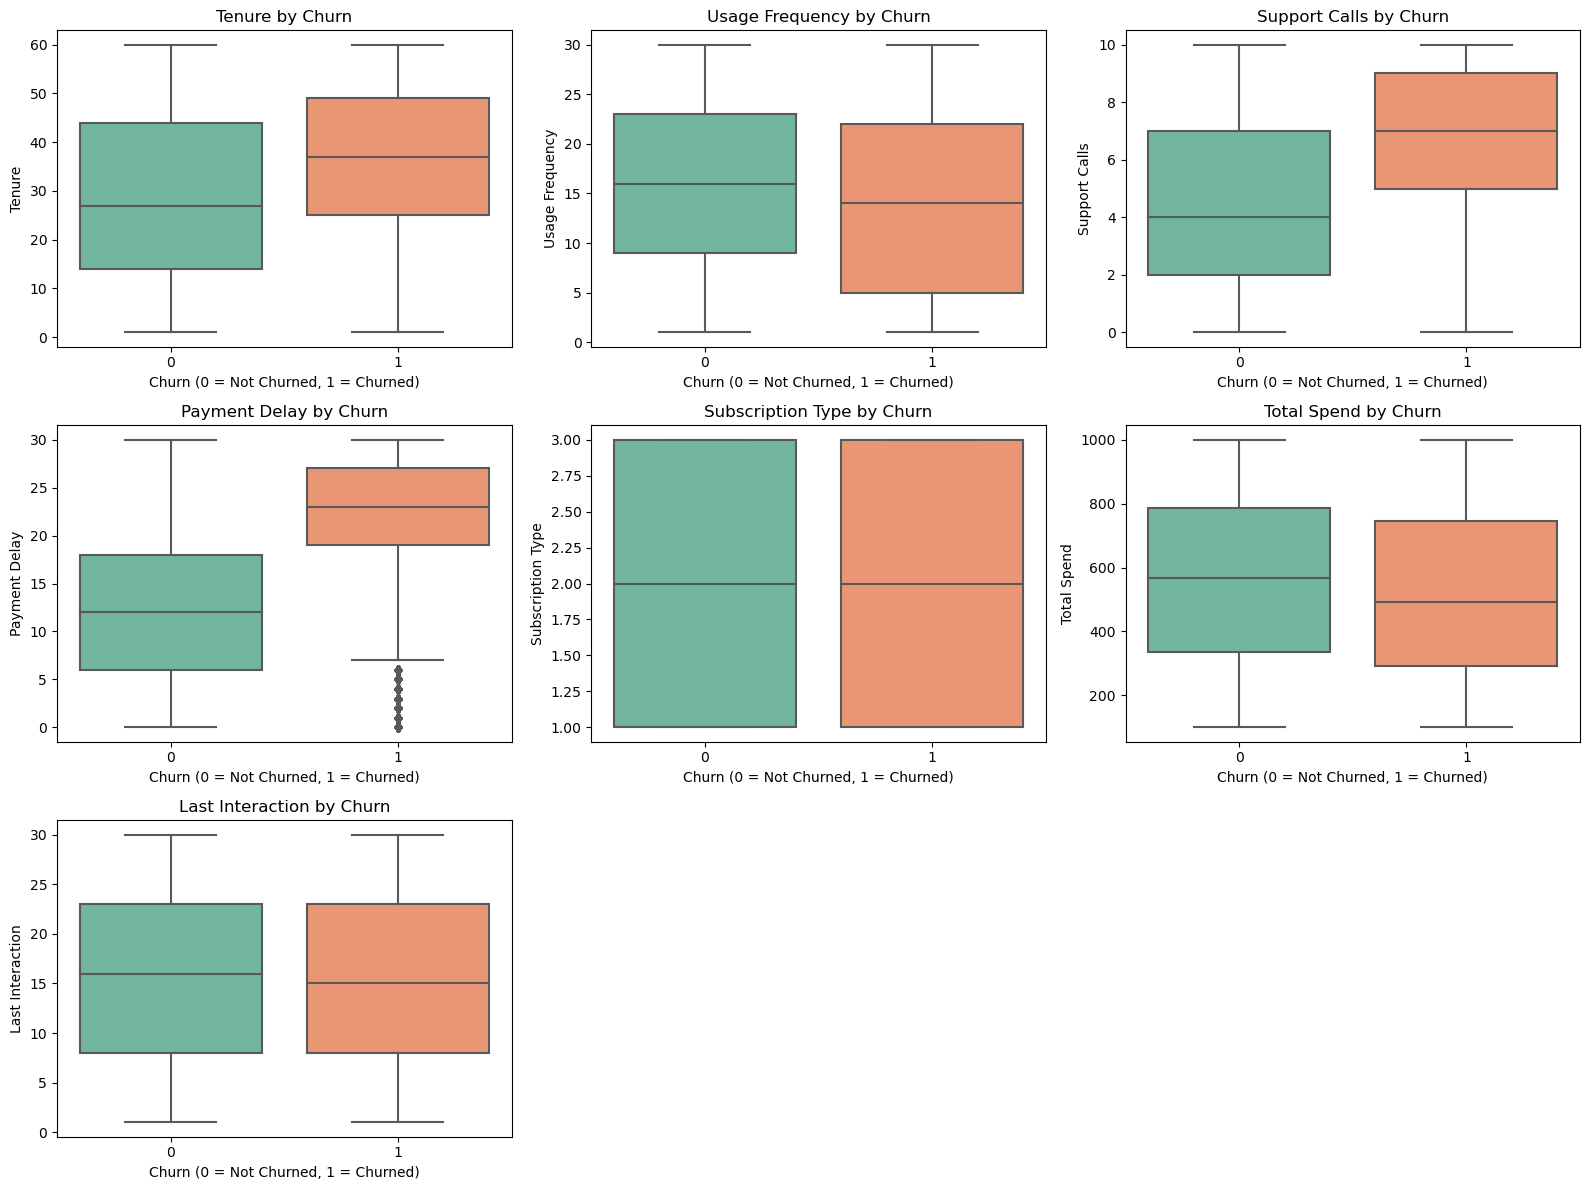

In [16]:
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

# Columns to test
features = ['Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 
            'Subscription Type', 'Total Spend', 'Last Interaction']

# Split the data into churned and non-churned groups
churned = df[df['Churn'] == 1]
not_churned = df[df['Churn'] == 0]

# Perform t-tests for each feature
t_test_results = {}
for feature in features:
    t_stat, p_value = ttest_ind(
        churned[feature], 
        not_churned[feature], 
        equal_var=False  # Welch's t-test
    )
    t_test_results[feature] = {'t-statistic': t_stat, 'p-value': p_value}

# Display the t-test results
t_test_results_df = pd.DataFrame(t_test_results).T
print("Independent Samples t-test Results:")
print(t_test_results_df)

# Visualize the results using boxplots
plt.figure(figsize=(16, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Churn', y=feature, data=df, palette='Set2')
    plt.title(f"{feature} by Churn")
    plt.xlabel("Churn (0 = Not Churned, 1 = Churned)")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


In [17]:
# Split data into independent and dependent variables
X = df[['Gender', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 
        'Subscription Type', 'Contract Length', 'Total Spend', 'Last Interaction']]
y = df['Churn']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss')  # Avoid warning by specifying eval_metric
}

# Evaluate each model
model_results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store the results
    model_results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Convert results to a DataFrame for better readability
results_df = pd.DataFrame(model_results).T
print("Model Evaluation Results:")
print(results_df)

C:\Users\Dell1\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Evaluation Results:
                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.817243   0.796753  0.823085  0.809705
Decision Tree        0.964427   0.961892  0.962841  0.962366
Random Forest        0.965748   0.954260  0.974186  0.964120
XGBoost              0.968155   0.960390  0.972706  0.966509


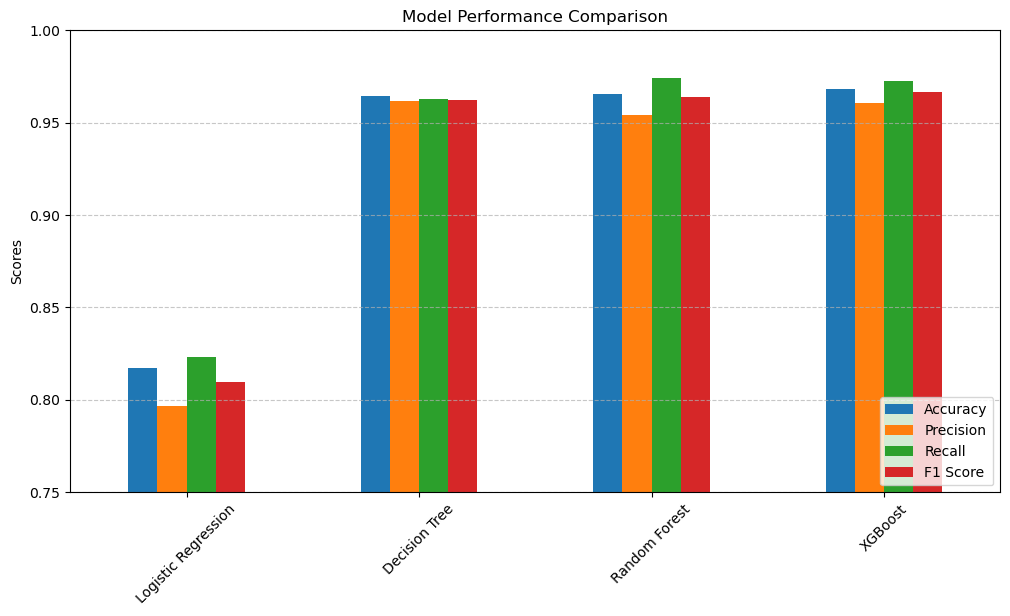

In [18]:
import matplotlib.pyplot as plt

# Plot accuracy comparison
results_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(kind='bar', figsize=(12, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Scores")
plt.xticks(rotation=45)
plt.ylim(0.75, 1.0)
plt.legend(loc="lower right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


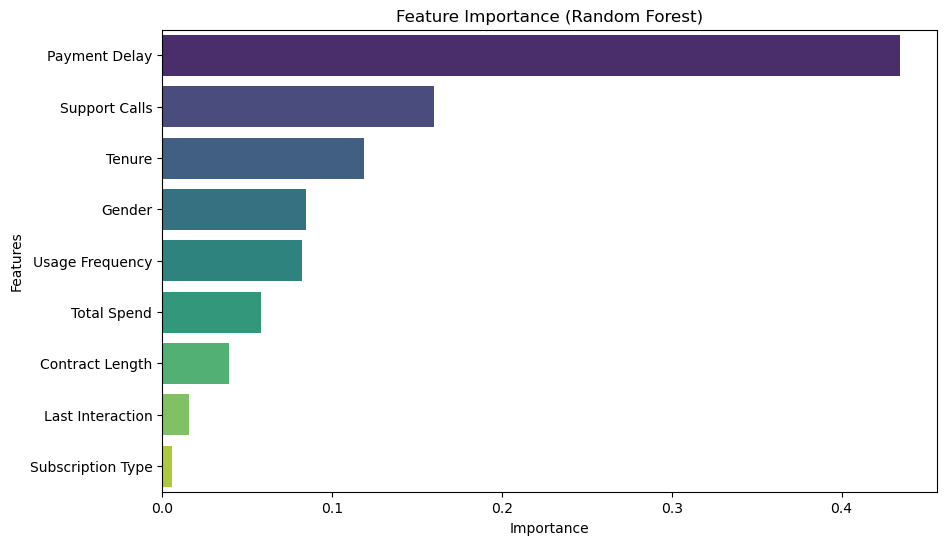

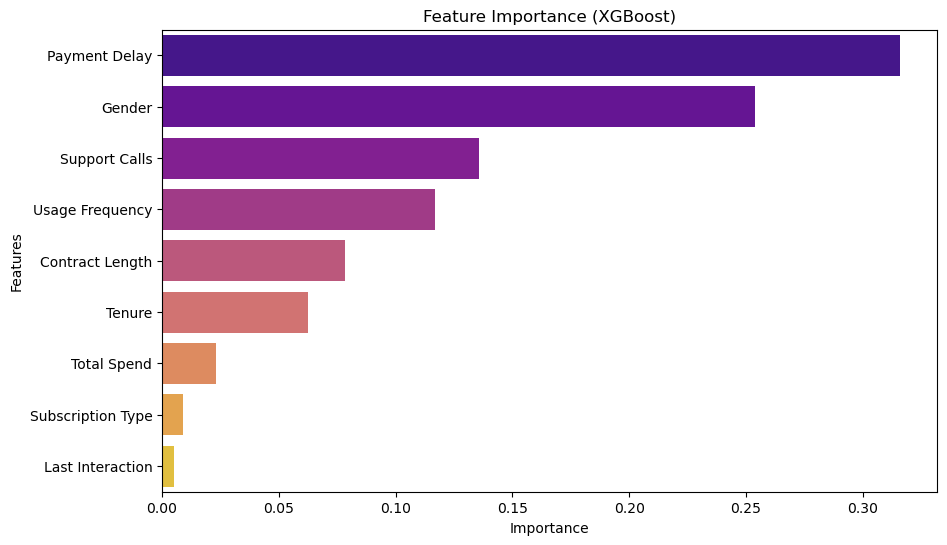

In [19]:
# Random Forest Feature Importance
importances = models['Random Forest'].feature_importances_
features = X.columns
rf_importances = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importances, palette='viridis')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# XGBoost Feature Importance
xgb_importances = pd.DataFrame({'Feature': features, 'Importance': models['XGBoost'].feature_importances_}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_importances, palette='plasma')
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


In [20]:
# Train the XGBoost model (ensure the 'models' dictionary has been used as in the earlier code)
xgboost_model = models['XGBoost']

# Save the model to a file
with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(xgboost_model, file)

print("XGBoost model saved successfully!")


XGBoost model saved successfully!
